In [1]:
#options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

# 가설 검정
### 카이제곱 검정
: 두 범주형 변수가 서로 상관이 있는지 판단하는 통계적 검정방법.
예) 학력, 성별, 직업의 만족도

### child 별 장난감 보유 현황
- 귀무가설 : child1과 child2의 장난감 보유수에 대한 만족도는 차이가 없다. (분석할 가치가 없다)
- 대립가설 : child1과 child2의 장난감 보유수에 대한 만족도는 차이가 있다

In [2]:
# child별 장난감 보유 현황
    child1 <- c(5,11,1)
    child2 <- c(4,7,3)
   

In [3]:
# 분석을 위해 데이터 합치기
toy <- cbind(child1,child2)
toy

child1,child2
5,4
11,7
1,3


In [4]:
# 행의 이름 만들기
rownames(toy) <- c("car","truck","doll")
toy

,child1,child2
car,5,4
truck,11,7
doll,1,3


In [5]:
# 카이제곱 검정
chisq.test(toy)
#approximation 근사값

Warning message in chisq.test(toy):
“카이제곱 approximation은 정확하지 않을수도 있습니다”



	Pearson's Chi-squared test

data:  toy
X-squared = 1.7258, df = 2, p-value = 0.4219


### 결론
p-value = 0.4219 > 0.05(유의수준 : 95%의 신뢰구간)  --> 귀무가설
child1과 child2의 데이터는 통계적으로 큰 차이가 없다.


---
p-value는 0 에 가까울 수록 좋다. 
미리 정해진 유의수준(일반적으로0.05)보다 작으면 대립가설을 채택하고 크면 귀무가설을 채택한다.
df=2: 검정에서 사용된 자유도는 2이다.
카이제곱 검정의 자유도는 3개의 범주가 있다면 자유도는 3-1=2가 된다. (자유도는 샘플링할때 모집단이랑 자유도가 비슷하면 잘한거다)


### Warnig
### 통계의 최소 데이타수는 5개
### 머신러닝은 150개 
데이터량이 적은경우 발생
--> 피셔검정 : 표본수가 적거나 데이터의 분포가 치우친경우


In [6]:
# 피셔검정
fisher.test(toy)


	Fisher's Exact Test for Count Data

data:  toy
p-value = 0.5165
alternative hypothesis: two.sided


p-value = 0.5165 > 0.05 --> 귀무가설
대립가설 : 대립가설은 'two.sided' 로 설정되어 있어 양측검정을 나타낸다. 


In [7]:
# 상관계수
cor(child1,child2)
# 두 변수가 거이 똑같다(차이가 없다)

[1] 0.9862414

# t- 검정


In [8]:
# 귀무가설 : 건전지의 수명은 1000시간이다.
# 대립가설 : 건전지의 수명은 1000시간이 아니다.


In [11]:
# 데이터의 분포가 정규분포인지 확인 (Shapiro-Wilk 검정)
# 귀무가설 : 자료가 정규분포에 따른다.
# 대립가설 : 자료가 정규분포에 따르지 않는다.
bat <- c(980,1008,968,1032,1012,1002,996,1017)
shapiro.test(bat)


	Shapiro-Wilk normality test

data:  bat
W = 0.97706, p-value = 0.9469


p-value = 0.9469 > 0.05 -> 귀무가설 
W = 0.97706 값이 1에 가까울스록 정규성에 가깝다.

In [12]:
# t-검정
t.test(bat, mu=1000, alternative = "two.sided")

# mu : 비교하는 대상의 평균
# alternative
# - two.sided : 데이터가 평균과 다르다.
# - greater : 데이터가 평균보다 크다.
# - less : 데이터가 평균보다 작다.



	One Sample t-test

data:  bat
t = 0.25891, df = 7, p-value = 0.8032
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
  984.7508 1018.9992
sample estimates:
mean of x 
 1001.875 


 p-value = 0.8032 > 0,05 -> 귀무가설 

In [14]:
# 어떤 학급의 수학 점수 평균 : 55점
# 0교시 수업을 한 후에 학생들의 성적이 올랐을까?
# 귀무가설 : 성적이 오르지 않았다.
# 대립가설 : 성적이 올랐다.
exam <- read.csv("./Data/exam.csv")

In [20]:

exam
mean(exam$score)


no,score
<int>,<int>
1,58
2,49
3,39
4,99
5,32
6,88
7,62
8,30
9,55


[1] 56.17647

In [24]:
shapiro.test(exam$score)


	Shapiro-Wilk normality test

data:  exam$score
W = 0.91143, p-value = 0.1058


In [25]:
summary(exam$score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  30.00   42.00   55.00   56.18   62.00   99.00 

In [26]:

t.test(exam$score, mu=55, alternative = "greater")
# 귀무가설


	One Sample t-test

data:  exam$score
t = 0.24546, df = 16, p-value = 0.4046
alternative hypothesis: true mean is greater than 55
95 percent confidence interval:
 47.80855      Inf
sample estimates:
mean of x 
 56.17647 



30 32 39 42 44 49 53 55 57 58 62 65 88 99 
 1  1  2  1  1  1  1  2  1  1  1  1  2  1 

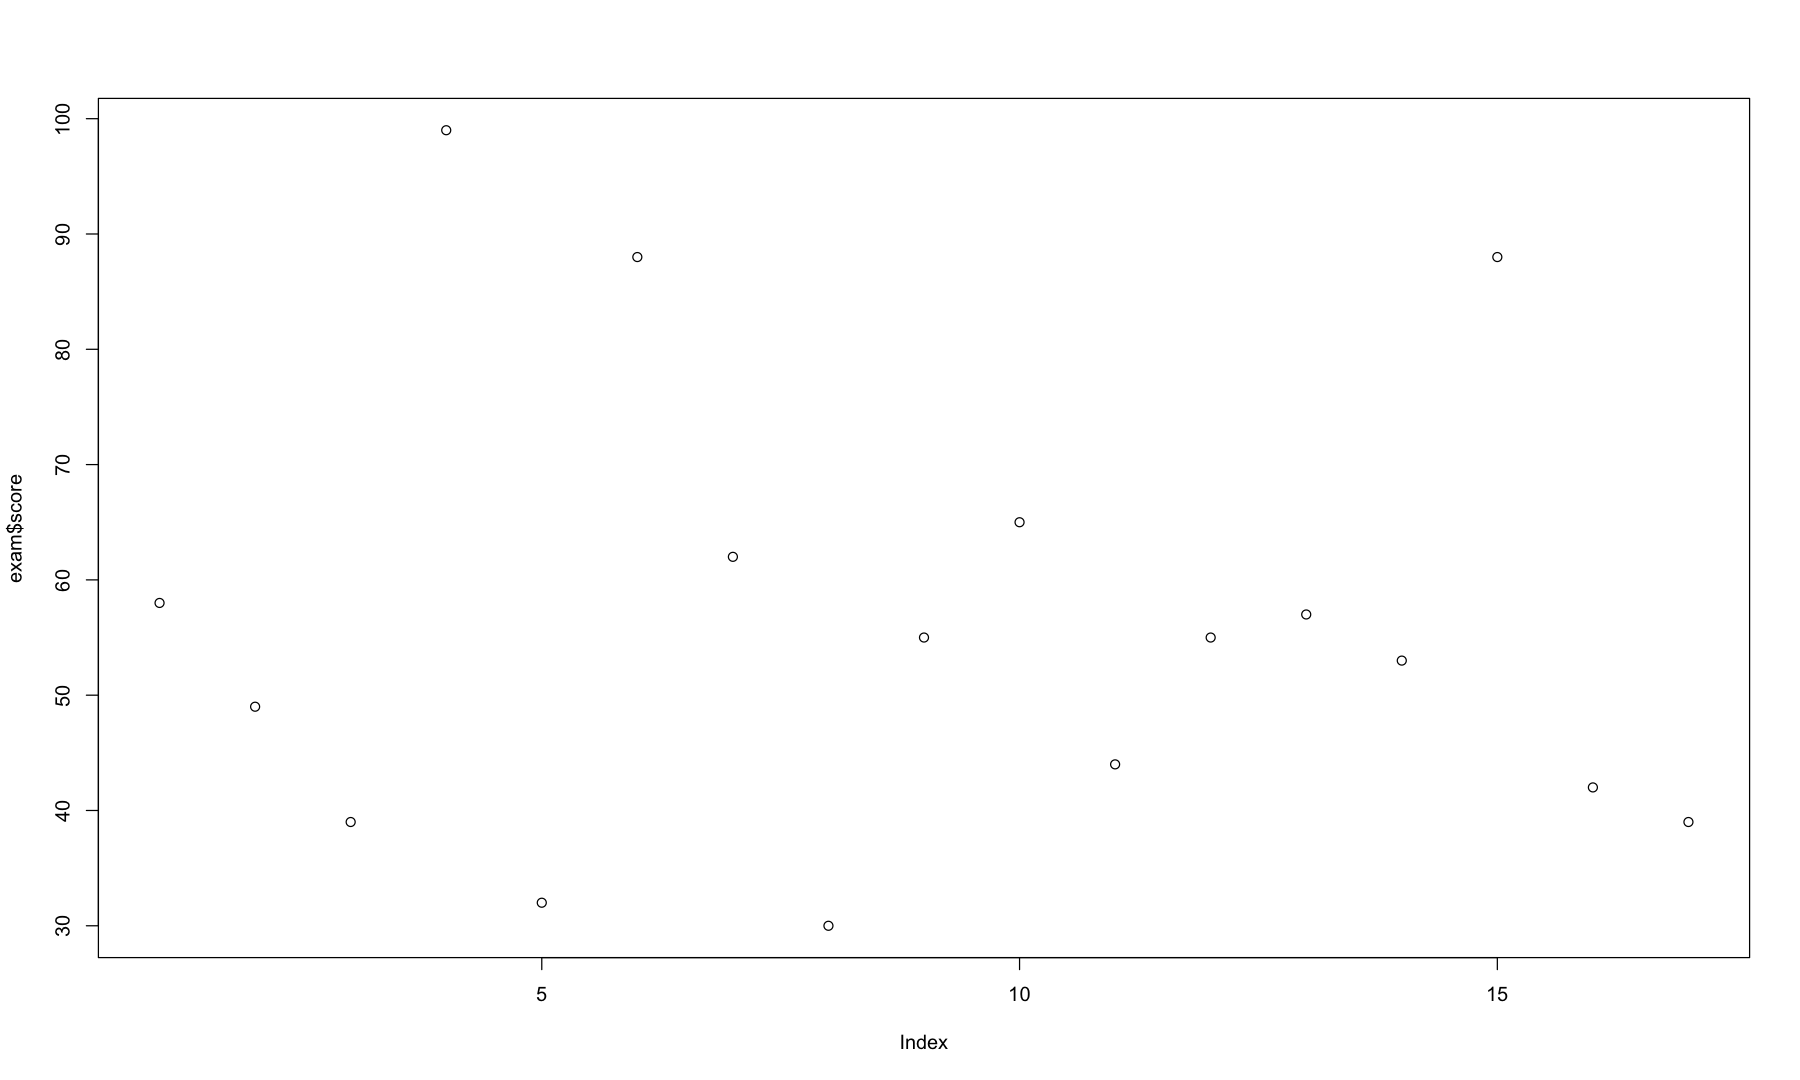

In [28]:
table(exam$score)
par(bg = 'white')
plot(exam$score)

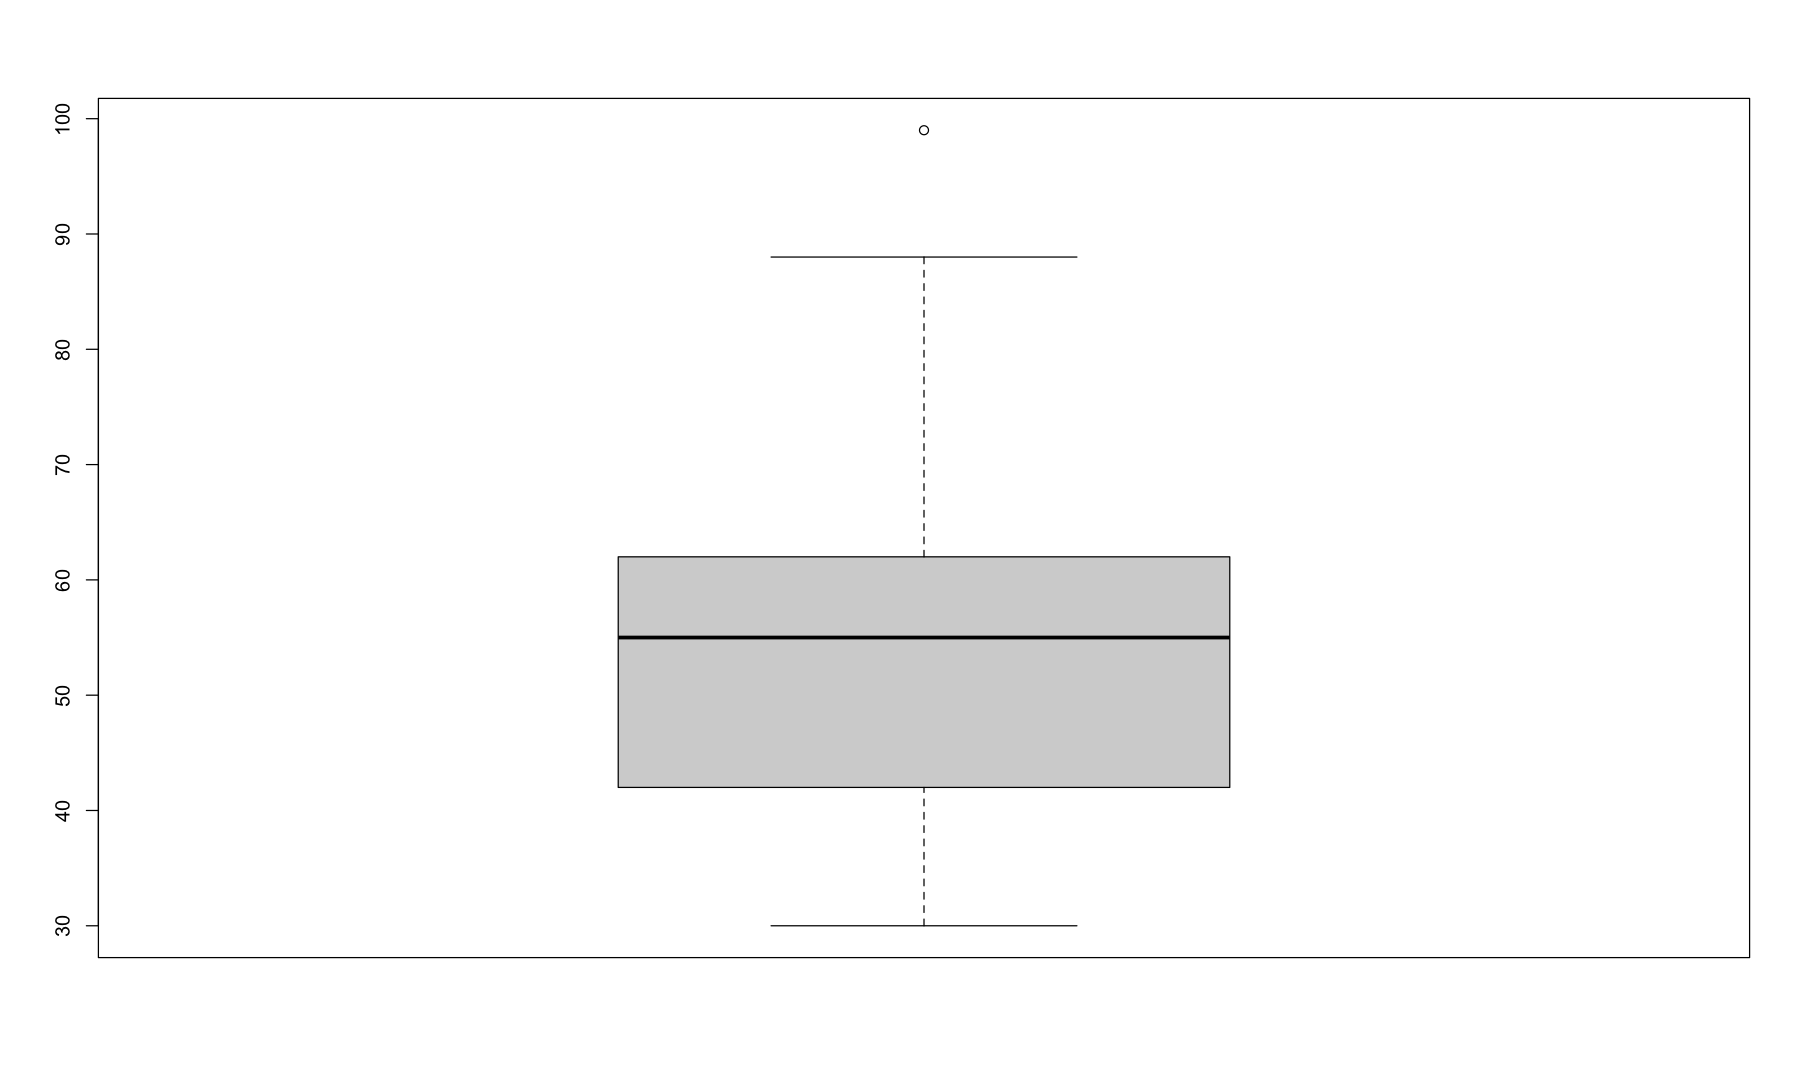

In [29]:
# 특이치가 존재함으로 평균이 올랏음에도 귀무가설이다. 통계는 정규분포에 해당하지 않는건 빼고 계산한다
par(bg = 'white')
boxplot(exam$score)

In [35]:
# 표본이 2개인 t검정
# 귀무가설 : 복용 전후의 차이가 없다
# 대립가설 : 복용 전후의 차이가 있다
preMedicine <- read.csv("./Data/preMedicine.csv")
postMedicine <- read.csv("./Data/postMedicine.csv")
pre <-preMedicine$data
post <- postMedicine$data
t.test(pre, post, alternative = "two.sided")

# p-value = 0.7165 > 0.05 -> 귀무가설


	Welch Two Sample t-test

data:  pre and post
t = -0.36891, df = 17.987, p-value = 0.7165
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.745046  1.925046
sample estimates:
mean of x mean of y 
    10.63     11.04 


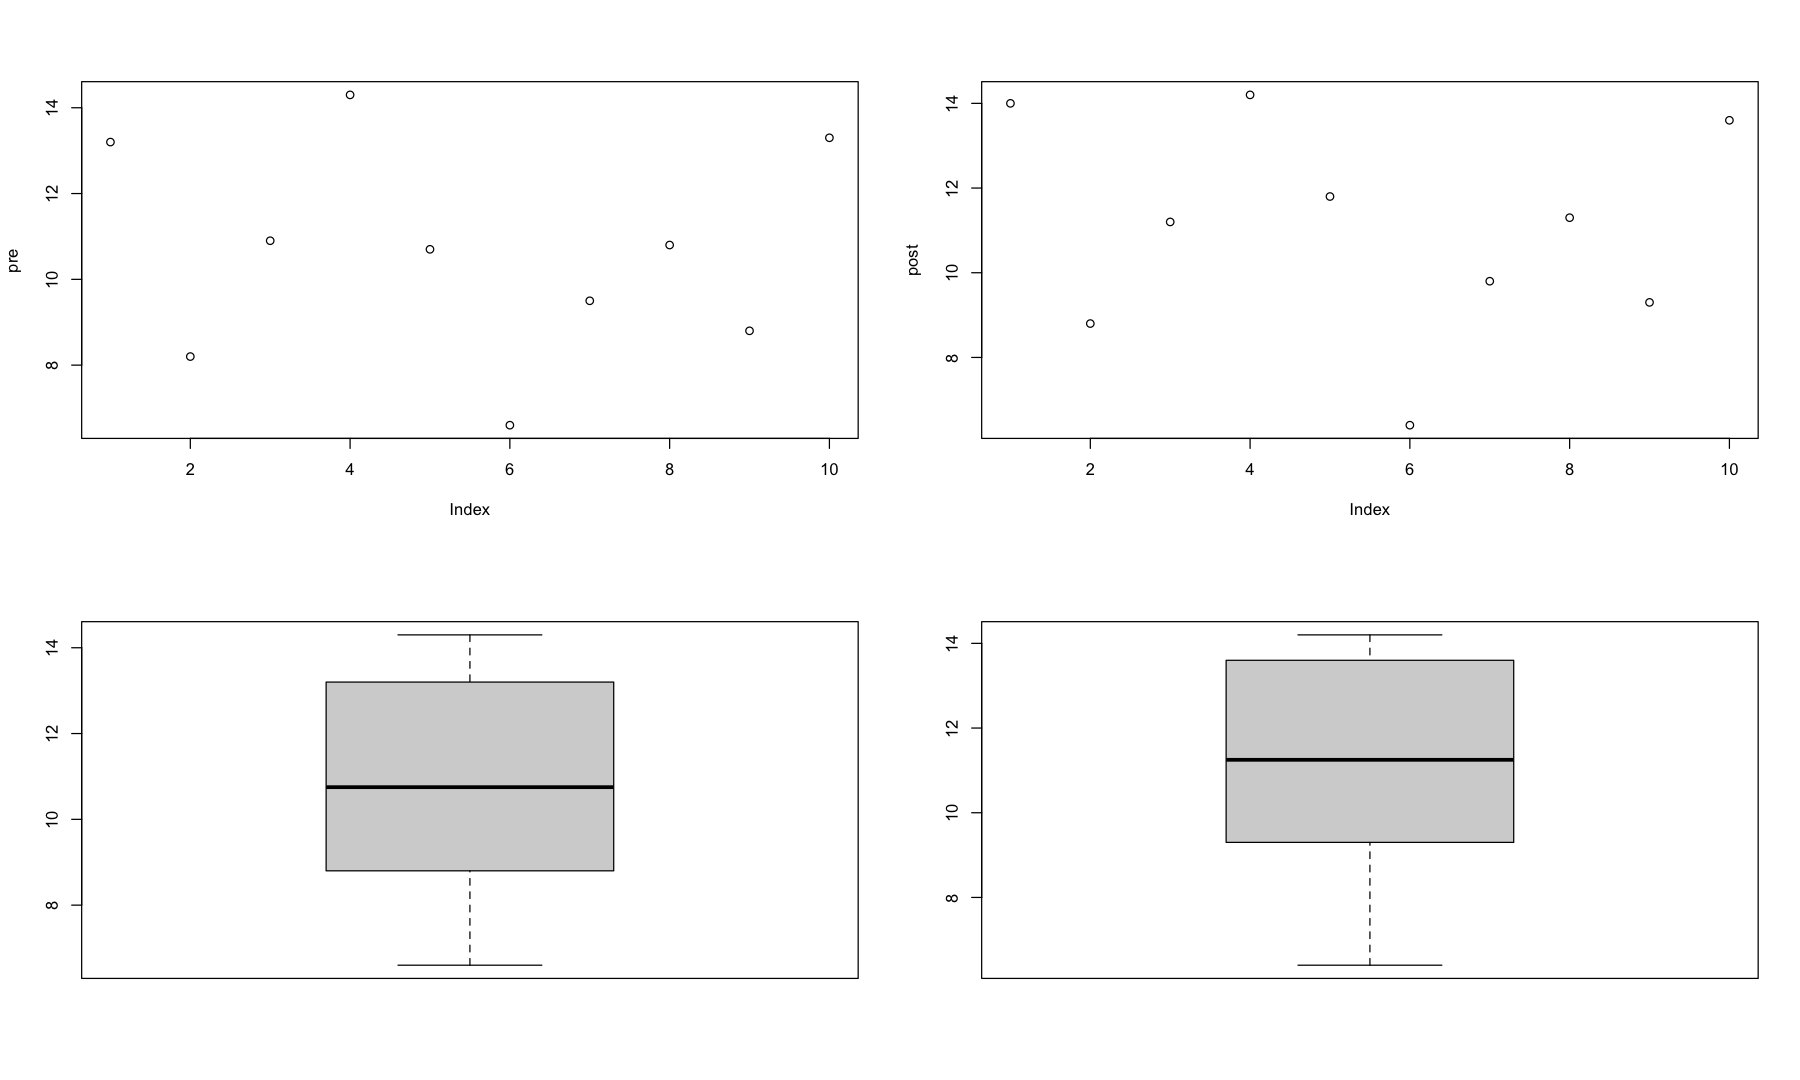

In [41]:
par(bg = 'white')
par(mfrow = c(2,2))
plot(pre)
plot(post)
boxplot(pre)
boxplot(post)

두개의 평균이 거이 차이가 없다

In [45]:
table(pre)
table(post)
summary(pre)
summary(post)

pre
 6.6  8.2  8.8  9.5 10.7 10.8 10.9 13.2 13.3 14.3 
   1    1    1    1    1    1    1    1    1    1 

post
 6.4  8.8  9.3  9.8 11.2 11.3 11.8 13.6   14 14.2 
   1    1    1    1    1    1    1    1    1    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.600   8.975  10.750  10.630  12.625  14.300 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.400   9.425  11.250  11.040  13.150  14.200 

# 상관관계

In [2]:
y <- c(1,2,3,4)
z <- c(0,5,7,9)

cor(y,z)
# 상관도가 높다

[1] 0.9693631

In [4]:
# 피어슨 상관계수 
cor(y,z, method = "pearson")
# 스피어맨 상관계수
cor(y,z, method = "spearman")

[1] 0.9693631

[1] 1

## 콜모고로프-스미노프 검정(KS Test)
: 주어진 2개의 데이터가 같은 분포를 갖는지를 검정


In [5]:
# 귀무가설 : 두개의 데이터의 분포가 같다
# 대립가설 : 두개의 데이터의 분포가 다르다

In [8]:
x <- rnorm(50)
y <- runif(50)
ks.test(x,y)


	Exact two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.5, p-value = 4.808e-06
alternative hypothesis: two-sided


p-value = 4.808e-06 < 0.05 --> 대립가설

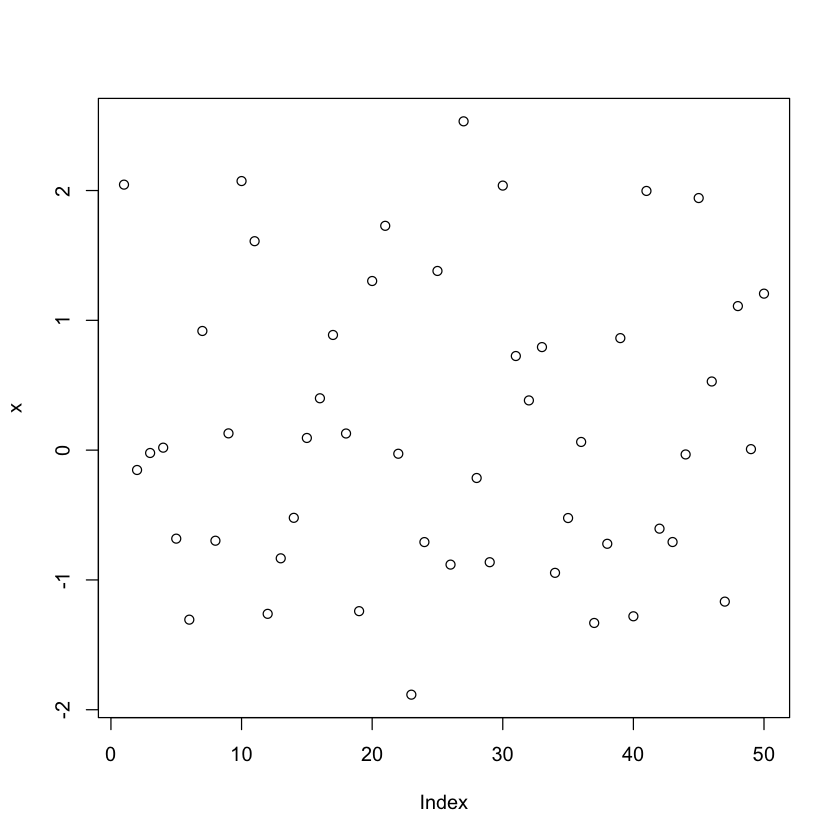

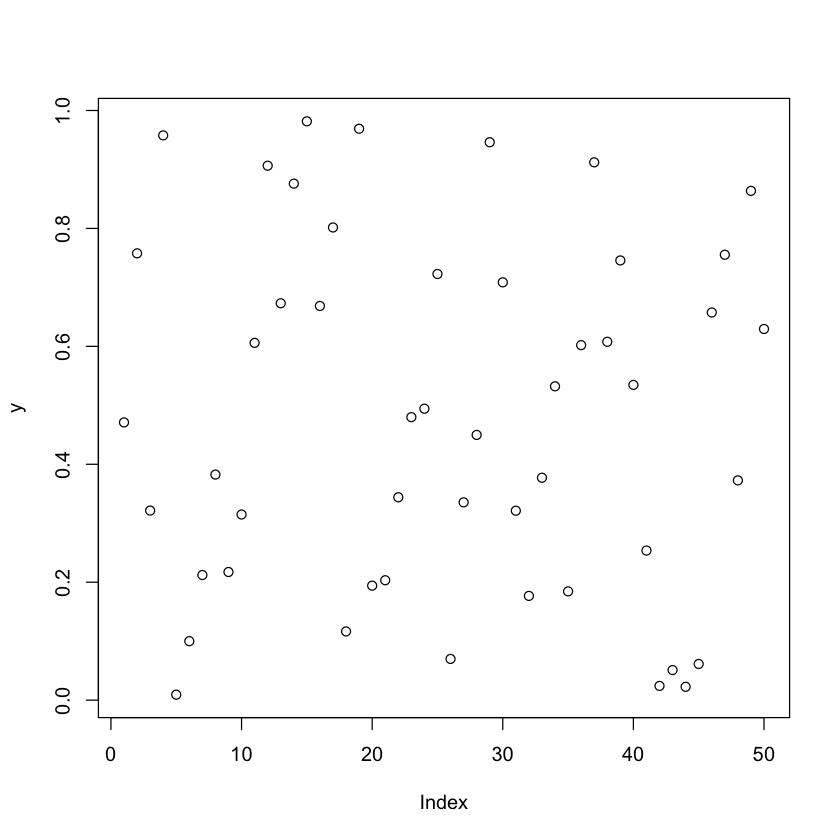

In [10]:
par(bg = 'white')
plot(x)
plot(y)

# 부호검정
#### 보통 식품, 음료에 많이 씀
: 2개의 데이터 사이에 차이가 있는지 검정하는 것

In [11]:
# 식사전과 식사후의 음료수 맛에 대한 평가
x <- c(4,1,1,4,3,3,2,5,3,3) # 식사전 평가
y <- c(1,1,3,2,5,1,4,4,3,1) # 식사후 평가

In [12]:
# 귀무가설 : 유의미한 차이가 없다.
# 대립가설 : 유의미한 차이가 있다.

In [16]:
binom.test(c(length(x[x>y]),length(x[x<y])))


	Exact binomial test

data:  c(length(x[x > y]), length(x[x < y]))
number of successes = 5, number of trials = 8, p-value = 0.7266
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2448632 0.9147666
sample estimates:
probability of success 
                 0.625 


p-value = 0.7266 > 0.05 --> 귀무가설

In [15]:
length(x[x>y])

[1] 5

## 비율 검정
: 2개의 데이터 사이에 비율의 차이가 있는지를 검정

In [17]:
# 맥주를 좋아하시나요? 라는 질문에 서울에서는 400명중  360명, 부산에서는 200명 중 136명이 좋아한다고 답했다면 
# 둘의 비율 차이가 있다고 할 수 있는가?

# 귀무가설 : 유의미한 차이가 없다
# 대립가설 : 유의미한 차이다 있다

hite <- c(360, 136)
sample <- c(400,200)

prop.test(hite,sample)


	2-sample test for equality of proportions with continuity correction

data:  hite out of sample
X-squared = 43.515, df = 1, p-value = 4.207e-11
alternative hypothesis: two.sided
95 percent confidence interval:
 0.14523 0.29477
sample estimates:
prop 1 prop 2 
  0.90   0.68 


p-value = 4.207e-11 <0.05 대립가설 